## Import libraries

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import LabelEncoder, PowerTransformer
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression, Ridge, Lasso
#Regressors
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor


pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings(action="ignore")


In [3]:
train = pd.read_csv("Train.csv")

In [4]:
test = pd.read_csv("Test.csv")

In [5]:
ss = pd.read_csv("SampleSubmission.csv")

In [6]:
train.head()

,ID,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation marine,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,ID_000000,2019-01-01 00:00:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,NaN,863.0,1051.0,1899.0,0.0,7096.0,43.0,73.0,49.0,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,5010.0,6541.0
1,ID_000001,2019-01-01 01:00:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,NaN,920.0,1009.0,1658.0,0.0,7096.0,43.0,71.0,50.0,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,4810.0,6492.0
2,ID_000002,2019-01-01 02:00:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,NaN,1164.0,973.0,1371.0,0.0,7099.0,43.0,73.0,50.0,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,4733.0,6448.0
3,ID_000003,2019-01-01 03:00:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,NaN,1503.0,949.0,779.0,0.0,7098.0,43.0,75.0,50.0,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,4227.0,5932.0
4,ID_000004,2019-01-01 04:00:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,NaN,1826.0,953.0,720.0,0.0,7097.0,43.0,74.0,42.0,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,3841.0,5604.0


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27500 entries, 0 to 27499
Data columns (total 30 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   ID                                           27500 non-null  object 
 1   time                                         27500 non-null  object 
 2   generation biomass                           27482 non-null  float64
 3   generation fossil brown coal/lignite         27483 non-null  float64
 4   generation fossil coal-derived gas           27483 non-null  float64
 5   generation fossil gas                        27483 non-null  float64
 6   generation fossil hard coal                  27483 non-null  float64
 7   generation fossil oil                        27482 non-null  float64
 8   generation fossil oil shale                  27483 non-null  float64
 9   generation fossil peat                       27483 non-null  float64
 10

In [8]:
train.isnull().sum()

ID                                                 0
time                                               0
generation biomass                                18
generation fossil brown coal/lignite              17
generation fossil coal-derived gas                17
generation fossil gas                             17
generation fossil hard coal                       17
generation fossil oil                             18
generation fossil oil shale                       17
generation fossil peat                            17
generation geothermal                             17
generation hydro pumped storage aggregated     27500
generation hydro pumped storage consumption       18
generation hydro run-of-river and poundage        18
generation hydro water reservoir                  17
generation marine                                 18
generation nuclear                                16
generation other                                  17
generation other renewable                    

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7564 entries, 0 to 7563
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   ID                                           7564 non-null   object 
 1   time                                         7564 non-null   object 
 2   generation biomass                           7563 non-null   float64
 3   generation fossil brown coal/lignite         7563 non-null   float64
 4   generation fossil coal-derived gas           7563 non-null   float64
 5   generation fossil gas                        7563 non-null   float64
 6   generation fossil hard coal                  7563 non-null   float64
 7   generation fossil oil                        7563 non-null   float64
 8   generation fossil oil shale                  7563 non-null   float64
 9   generation fossil peat                       7563 non-null   float64
 10  

In [10]:
test.isnull().sum()

ID                                                0
time                                              0
generation biomass                                1
generation fossil brown coal/lignite              1
generation fossil coal-derived gas                1
generation fossil gas                             1
generation fossil hard coal                       1
generation fossil oil                             1
generation fossil oil shale                       1
generation fossil peat                            1
generation geothermal                             1
generation hydro pumped storage aggregated     7564
generation hydro pumped storage consumption       1
generation hydro run-of-river and poundage        1
generation hydro water reservoir                  1
generation marine                                 1
generation nuclear                                1
generation other                                  1
generation other renewable                        1
generation s

In [11]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
generation biomass,27482.0,396.780220,88.974530,0.0,340.00,376.0,475.00,592.0
generation fossil brown coal/lignite,27483.0,476.247098,363.187665,0.0,0.00,558.0,856.00,999.0
generation fossil coal-derived gas,27483.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
generation fossil gas,27483.0,5555.281119,2252.850015,1518.0,4069.00,4871.0,6269.00,20034.0
generation fossil hard coal,27483.0,4411.479242,2015.548483,0.0,2618.00,4698.0,6062.50,8359.0
generation fossil oil,27482.0,303.007059,53.850784,0.0,267.00,303.0,336.00,449.0
generation fossil oil shale,27483.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
generation fossil peat,27483.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
generation geothermal,27483.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
generation hydro pumped storage aggregated,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


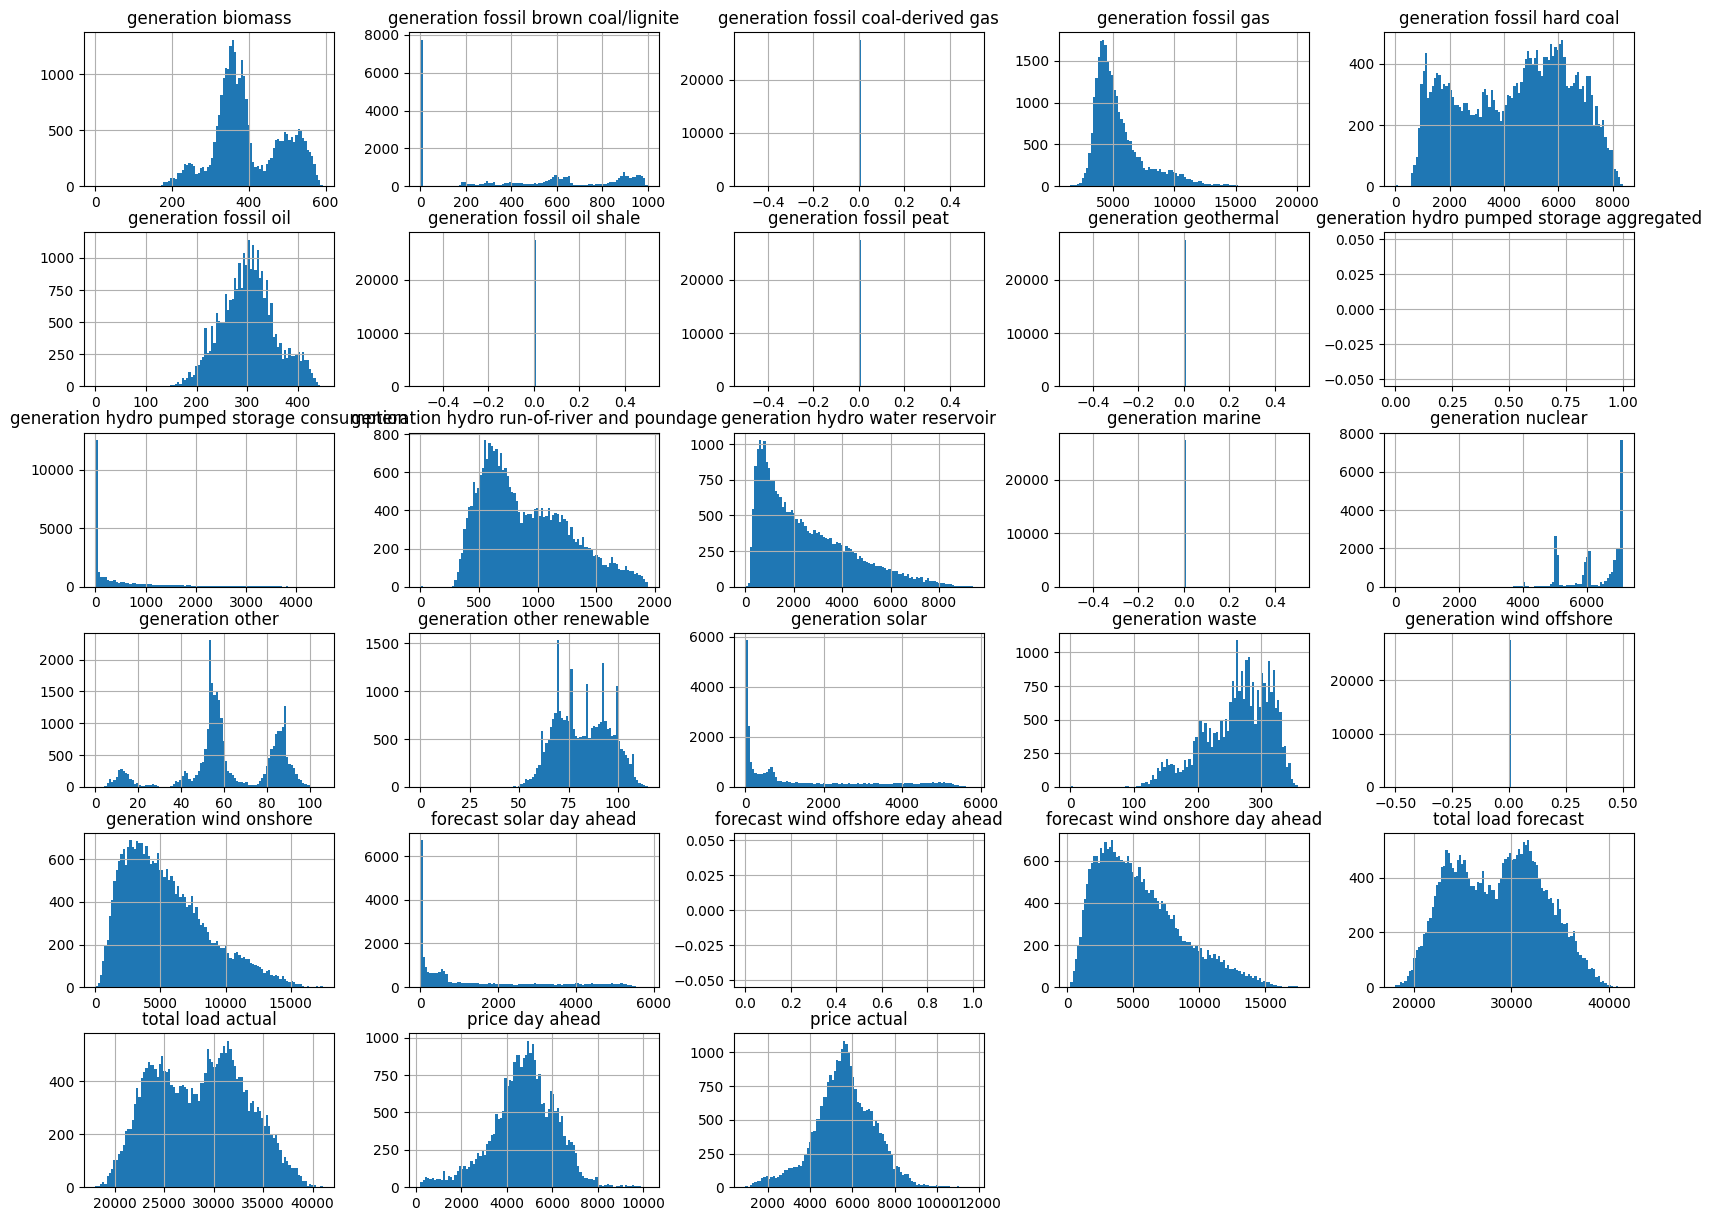

In [12]:
train.hist(bins=100, figsize=(20, 15))
plt.show()

In [13]:
train.columns

Index(['ID', 'time', 'generation biomass',
       'generation fossil brown coal/lignite',
       'generation fossil coal-derived gas', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation fossil oil shale', 'generation fossil peat',
       'generation geothermal', 'generation hydro pumped storage aggregated',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation marine',
       'generation nuclear', 'generation other', 'generation other renewable',
       'generation solar', 'generation waste', 'generation wind offshore',
       'generation wind onshore', 'forecast solar day ahead',
       'forecast wind offshore eday ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual'],
      dtype='object')

In [14]:
train.drop(['generation hydro pumped storage aggregated', 'forecast wind offshore eday ahead',
           'generation fossil coal-derived gas', 'generation fossil oil shale',
           'generation fossil peat', 'generation geothermal',
           'generation marine', 'generation wind offshore'], axis=1, inplace=True)

In [15]:
test.drop(['generation hydro pumped storage aggregated', 'forecast wind offshore eday ahead',
          'generation fossil coal-derived gas', 'generation fossil oil shale',
           'generation fossil peat', 'generation geothermal',
           'generation marine', 'generation wind offshore'], axis=1, inplace=True)

## Filling null values

In [16]:
lst = ['generation biomass',
       'generation fossil brown coal/lignite',
       'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation wind onshore',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir',
       'generation nuclear', 'generation other', 'generation other renewable',
       'generation solar', 'generation waste', 'total load actual']

In [17]:
for i in lst:
    train[i].fillna(train[i].median(), inplace=True)

In [18]:
train.isnull().sum()

ID                                             0
time                                           0
generation biomass                             0
generation fossil brown coal/lignite           0
generation fossil gas                          0
generation fossil hard coal                    0
generation fossil oil                          0
generation hydro pumped storage consumption    0
generation hydro run-of-river and poundage     0
generation hydro water reservoir               0
generation nuclear                             0
generation other                               0
generation other renewable                     0
generation solar                               0
generation waste                               0
generation wind onshore                        0
forecast solar day ahead                       0
forecast wind onshore day ahead                0
total load forecast                            0
total load actual                              0
price day ahead     

In [19]:
for i in lst:
    test[i].fillna(test[i].median(), inplace=True)

In [20]:
test.isnull().any().any()

False

In [21]:
x_train = train.copy()
x_test = test.copy()

In [22]:
x_train.isnull().any().any()

False

In [23]:
corr_mat = x_train.corr()
corr_mat['price actual'].sort_values('ascending'==False)

generation hydro pumped storage consumption   -0.412479
generation hydro run-of-river and poundage    -0.234087
forecast wind onshore day ahead               -0.202234
generation wind onshore                       -0.201445
generation nuclear                            -0.046350
generation hydro water reservoir               0.045428
generation solar                               0.095029
forecast solar day ahead                       0.097231
generation waste                               0.124084
generation other                               0.130563
generation other renewable                     0.164595
generation biomass                             0.224893
generation fossil oil                          0.347051
generation fossil brown coal/lignite           0.430181
total load actual                              0.451245
total load forecast                            0.452550
generation fossil gas                          0.457699
generation fossil hard coal                    0

### Datetime features

In [24]:
x_train.columns

Index(['ID', 'time', 'generation biomass',
       'generation fossil brown coal/lignite', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation nuclear',
       'generation other', 'generation other renewable', 'generation solar',
       'generation waste', 'generation wind onshore',
       'forecast solar day ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual'],
      dtype='object')

In [25]:
x_train.tail()

,ID,time,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
27495,ID_027495,2022-02-19 15:00:00,386.0,577.0,7157.0,4270.0,329.0,90.0,1463.0,2378.0,6078.0,60.0,99.0,3698.0,325.0,4971.0,2548.0,6239.0,33700.0,33529.0,5908.0,6532.0
27496,ID_027496,2022-02-19 16:00:00,394.0,540.0,7490.0,4384.0,327.0,90.0,1473.0,2310.0,6078.0,61.0,101.0,3199.0,333.0,5297.0,1967.0,6180.0,33350.0,33186.0,5700.0,6322.0
27497,ID_027497,2022-02-19 17:00:00,398.0,606.0,7633.0,4562.0,328.0,5.0,1471.0,3445.0,6077.0,58.0,102.0,2438.0,333.0,5566.0,1306.0,6222.0,33273.0,33097.0,5992.0,6604.0
27498,ID_027498,2022-02-19 18:00:00,400.0,627.0,8148.0,4499.0,337.0,0.0,1499.0,5303.0,6074.0,63.0,100.0,987.0,335.0,5628.0,534.0,6315.0,33622.0,33550.0,6228.0,7147.0
27499,ID_027499,2022-02-19 19:00:00,399.0,618.0,8364.0,4445.0,339.0,0.0,1529.0,6815.0,6078.0,62.0,97.0,273.0,337.0,5903.0,190.0,6502.0,36246.0,36076.0,6204.0,7097.0


In [26]:
date_cols = ['time']
for feat in date_cols:
    x_train[feat]=pd.to_datetime(x_train[feat])

In [27]:
def extract_date_info(df,date_cols,):
    for feat in date_cols:
        df[feat +'_year'] = df[feat].dt.year
        df[feat +'_day'] = df[feat].dt.day
        df[feat +'_month'] = df[feat].dt.month
        df[feat+'_WeekDay'] = df[feat].dt.weekday
        df[feat+'_Quarter'] = df[feat].dt.quarter
        df[feat+'_hour'] = df[feat].dt.hour
    df.drop(columns=date_cols,axis=1,inplace=True)
    
extract_date_info(x_train, date_cols)  

In [28]:
x_train.head()

,ID,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual,time_year,time_day,time_month,time_WeekDay,time_Quarter,time_hour
0,ID_000000,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,17.0,6436.0,26118.0,25385.0,5010.0,6541.0,2019,1,1,1,1,0
1,ID_000001,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,71.0,50.0,195.0,5890.0,16.0,5856.0,24934.0,24382.0,4810.0,6492.0,2019,1,1,1,1,1
2,ID_000002,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,73.0,50.0,196.0,5461.0,8.0,5454.0,23515.0,22734.0,4733.0,6448.0,2019,1,1,1,1,2
3,ID_000003,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,75.0,50.0,191.0,5238.0,2.0,5151.0,22642.0,21286.0,4227.0,5932.0,2019,1,1,1,1,3
4,ID_000004,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,74.0,42.0,189.0,4935.0,9.0,4861.0,21785.0,20264.0,3841.0,5604.0,2019,1,1,1,1,4


In [29]:
for feat in date_cols:
    x_test[feat]=pd.to_datetime(x_test[feat])

In [30]:
def extract_date_info(df,date_cols,):
    for feat in date_cols:
        df[feat +'_year'] = df[feat].dt.year
        df[feat +'_day'] = df[feat].dt.day
        df[feat +'_month'] = df[feat].dt.month
        df[feat+'_WeekDay'] = df[feat].dt.weekday
        df[feat+'_Quarter'] = df[feat].dt.quarter
        df[feat+'_hour'] = df[feat].dt.hour
    df.drop(columns=date_cols,axis=1,inplace=True)
    
extract_date_info(x_test, date_cols)  

In [31]:
x_train.shape

(27500, 27)

In [32]:
x_test.shape

(7564, 26)

In [33]:
y = x_train['price actual']

In [34]:
x_train.drop('price actual', axis=1, inplace=True)

In [35]:
x_train.drop('ID', axis=1, inplace=True)
x_test.drop('ID', axis=1, inplace=True)

In [36]:
x_train.skew()

generation biomass                             0.211343
generation fossil brown coal/lignite          -0.124689
generation fossil gas                          1.745458
generation fossil hard coal                   -0.156183
generation fossil oil                          0.072826
generation hydro pumped storage consumption    2.023464
generation hydro run-of-river and poundage     0.636684
generation hydro water reservoir               0.971280
generation nuclear                            -0.857381
generation other                              -0.545024
generation other renewable                     0.026687
generation solar                               1.011374
generation waste                              -0.667582
generation wind onshore                        0.808473
forecast solar day ahead                       0.986633
forecast wind onshore day ahead                0.804367
total load forecast                            0.069094
total load actual                              0

In [37]:
x_test.skew()

generation biomass                            -0.816286
generation fossil brown coal/lignite           0.000995
generation fossil gas                          1.051966
generation fossil hard coal                   -0.033779
generation fossil oil                         -0.565372
generation hydro pumped storage consumption    2.629528
generation hydro run-of-river and poundage    -0.013365
generation hydro water reservoir               0.734962
generation nuclear                            -0.201137
generation other                              -2.145479
generation other renewable                    -0.448633
generation solar                               1.056987
generation waste                              -1.677757
generation wind onshore                        0.708888
forecast solar day ahead                       1.002513
forecast wind onshore day ahead                0.786071
total load forecast                            0.028788
total load actual                              0

In [38]:
# join train and test together
ntrain = x_train.shape[0]
ntest = x_test.shape[0]

all_data = pd.concat((x_train, x_test)).reset_index(drop=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (35064, 25)


In [39]:
all_data.columns

Index(['generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil gas', 'generation fossil hard coal',
       'generation fossil oil', 'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation nuclear',
       'generation other', 'generation other renewable', 'generation solar',
       'generation waste', 'generation wind onshore',
       'forecast solar day ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'time_year', 'time_day', 'time_month', 'time_WeekDay', 'time_Quarter',
       'time_hour'],
      dtype='object')

In [40]:
all_data['generation hydro'] = all_data['generation hydro pumped storage consumption'] + \
                               all_data['generation hydro run-of-river and poundage']+ \
                               all_data['generation hydro water reservoir'] 
        
all_data['generation fossil'] = all_data['generation fossil brown coal/lignite'] + \
                                all_data['generation fossil gas'] + all_data['generation fossil hard coal'] \
                                + all_data['generation fossil oil']
    
#all_data['total_load_forecast_actual'] = all_data['total load forecast'] / all_data['total load actual']

#all_data['wind_generation_forecast'] = all_data['generation wind onshore'] / all_data['forecast wind onshore day ahead']

all_data['generation'] = all_data['generation hydro'] + all_data['generation fossil'] + all_data['generation biomass'] + \
                        all_data['generation nuclear'] + all_data['generation solar'] + all_data['generation wind onshore'] \
                        + all_data['generation other'] + all_data['generation other renewable'] + all_data['generation waste']

In [41]:
all_data.head()

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,time_year,time_day,time_month,time_WeekDay,time_Quarter,time_hour,generation hydro,generation fossil,generation
0,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,17.0,6436.0,26118.0,25385.0,5010.0,2019,1,1,1,1,0,3813.0,10156.0,28251.0
1,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,71.0,50.0,195.0,5890.0,16.0,5856.0,24934.0,24382.0,4810.0,2019,1,1,1,1,1,3587.0,10437.0,27818.0
2,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,73.0,50.0,196.0,5461.0,8.0,5454.0,23515.0,22734.0,4733.0,2019,1,1,1,1,2,3508.0,9918.0,26796.0
3,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,75.0,50.0,191.0,5238.0,2.0,5151.0,22642.0,21286.0,4227.0,2019,1,1,1,1,3,3231.0,8859.0,25223.0
4,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,74.0,42.0,189.0,4935.0,9.0,4861.0,21785.0,20264.0,3841.0,2019,1,1,1,1,4,3499.0,8313.0,24620.0


In [42]:
#Get the new dataset
X = all_data[:ntrain]
test_final = all_data[ntrain:]

In [43]:
power = PowerTransformer(method = 'yeo-johnson', standardize=True)

In [44]:
X = power.fit_transform(X)
test_final = power.transform(test_final)

In [45]:
print(X.shape[1])
print(test_final.shape[1])

28
28


## Machine Learning Modelling

In [46]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2,random_state=7)

In [47]:
lr = LinearRegression()

In [48]:
lr.fit(X_train, y_train)

LinearRegression()

In [49]:
y_pred = lr.predict(X_val)

In [50]:
print('The result: ', np.sqrt(mean_squared_error(y_val, y_pred)))

The result:  886.5729785397801


In [51]:
y_testP = lr.predict(x_test)

ValueError: X has 25 features, but LinearRegression is expecting 28 features as input.

In [ ]:
y_testP

array([6593.14685509, 6511.41149162, 6195.26697409, ..., 7446.5274972 ,
       7195.2432512 , 7181.26494149])

## Extra Tree Model

In [ ]:
et_reg = ExtraTreesRegressor(max_depth=8, max_features='auto', 
                             min_samples_split=8, min_weight_fraction_leaf=0.0,
                             n_estimators=800, random_state=12, criterion='mse')

In [ ]:
kfold=KFold(n_splits=10, random_state=12, shuffle =True)

In [ ]:
def et_predict(estimator,train,label,test,estimator_name):
    mean_train = []
    mean_test_val = []
    test_pred = []
    val_pred = np.empty((len(train), ))
    for count, (train_index,test_index) in enumerate(kfold.split(train,label)):
        x_train,x_test = train[train_index], train[test_index]
        y_train,y_test = label.iloc[train_index], label.iloc[test_index]
        
        print(f'========================Fold{count +1}==========================')
        
        estimator.fit(x_train,y_train)
        train_predict = estimator.predict(x_train)
        test_predict = estimator.predict(x_test)
        val_pred[test_index] = (test_predict)
        f_test= (estimator.predict(test))
        test_pred.append(f_test)
        print('\nValidation scores', np.sqrt(mean_squared_error(y_test, test_predict)))
        print('\nTraining scores', np.sqrt(mean_squared_error(y_train, train_predict)))
        mean_train.append(np.sqrt(mean_squared_error(y_train, train_predict)))
        mean_test_val.append(np.sqrt(mean_squared_error(y_test,test_predict)))
    print('Average Testing RMSE score for 10 folds split:',np.mean(mean_test_val))
    print('Average Training RMSE score for 10 folds split:',np.mean(mean_train))
    print('standard Deviation for 10 folds split:',np.std(mean_test_val))
    return val_pred, test_pred, estimator_name

In [ ]:
et_val, et_test, et_estimator = et_predict(et_reg, X, y, test_final, 'et_reg')

========================Fold1==========================

Validation scores 691.5259117173956

Training scores 650.1233533294877
========================Fold2==========================

Validation scores 669.4049314725842

Training scores 651.9954603196732
========================Fold3==========================

Validation scores 657.0789010475654

Training scores 652.0548681106568
========================Fold4==========================

Validation scores 644.8812591382385

Training scores 653.588651263124
========================Fold5==========================

Validation scores 684.950546052232

Training scores 652.6499615733352
========================Fold6==========================

Validation scores 677.5041403974029

Training scores 649.8990503053116
========================Fold7==========================

Validation scores 681.0996587813506

Training scores 651.1021673783102
========================Fold8==========================

Validation scores 677.7433321560991

Training sco

In [ ]:
et_test_ = np.mean(et_test, axis=0)
pred = et_test_.reshape(-1, 1)

In [ ]:
params = {'lambda':4.2394363691623616,}

xgb_reg = XGBRegressor(**params, alpha=3.9582880869368857, booster='gbtree',
             colsample_bytree=0.8800173955734143, eval_metric='rmse',
             importance_type='gain',
             learning_rate=0.028299231815800803, max_bin=88,
             max_depth=5, min_child_weight=67,
             n_estimators=200, random_state=12,
             reg_alpha=4.571111745486189, reg_lambda=1.375203960747093,
             subsample=0.6490965300623969,
             )

lgb_reg = LGBMRegressor(bagging_freq=7, colsample_bytree=0.6596461695321297,
              lambda_l1=0.6548430294792729, lambda_l2=2.935128235687181,
              learning_rate=0.026200647230093844, max_bin=79, max_depth=5,
              metric='rmse', min_child_samples=70, n_estimators=1000,
              num_leaves=67, objective='regression', random_state=12,
              subsample=0.9084107983828029)

cat_reg =  CatBoostRegressor(iterations=2000, boosting_type='Plain', loss_function = 'RMSE', 
                        random_state=12, bootstrap_type='Bayesian',
                        od_type='Iter', od_wait=400, verbose=300)

rf_reg = RandomForestRegressor(max_depth=4, max_features='auto', 
                             min_samples_split=8, min_weight_fraction_leaf=0.0,
                             n_estimators=500, random_state=12, criterion='mse')

In [ ]:
reg = {
"LinearRegression": LinearRegression(),
"Ridge": Ridge(alpha=10000.0),
"Lasso": Lasso(alpha=10000.0),
'xgb': xgb_reg,
'lgbm': lgb_reg,
'catboost': cat_reg,
'extratree': et_reg,
'randomfr': rf_reg
}

In [ ]:
%%time
dic_train =  {"Model":[],"RMSE_Train":[]}
dic_val =  {"Model":[],"RMSE_Val":[]}
for name, model in reg.items():
    
    model.fit(X_train, y_train)
    #y_test_pre = model.predict(test_df)
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    
    rmse_train  = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_val  = np.sqrt(mean_squared_error(y_val, y_val_pred))
    print("--------------------------------------------------------------")
    print("Model:", name)
    print("\n-----Training Data Evalution-----")
    
    print("RMSE_TRAIN: ",np.sqrt(mean_squared_error(y_train, y_train_pred)))
    print("\nRMSE_VAL: ",np.sqrt(mean_squared_error(y_val, y_val_pred)))
    dic_train["Model"].append(name)
    dic_val["Model"].append(name)
    dic_train["RMSE_Train"].append(rmse_train)
    dic_val["RMSE_Val"].append(rmse_val)
final_data_T = pd.DataFrame(dic_train)
final_data_V = pd.DataFrame(dic_val)
print("==================================================================")
print("Best Model")
print("==================================================================")
print(final_data_T.max())
print(final_data_V.max())
print("==================================================================")
print(final_data_T.sort_values("RMSE_Train", axis = 0, ascending = True))
final_data_V.sort_values("RMSE_Val", axis = 0, ascending = True)

--------------------------------------------------------------
Model: LinearRegression

-----Training Data Evalution-----
RMSE_TRAIN:  901.7597304146486

RMSE_VAL:  886.5728884529435
--------------------------------------------------------------
Model: Ridge

-----Training Data Evalution-----
RMSE_TRAIN:  984.4076182027827

RMSE_VAL:  969.5217852940937
--------------------------------------------------------------
Model: Lasso

-----Training Data Evalution-----
RMSE_TRAIN:  1428.177437790556

RMSE_VAL:  1410.627076341577
--------------------------------------------------------------
Model: xgb

-----Training Data Evalution-----
RMSE_TRAIN:  431.70827089572475

RMSE_VAL:  433.83645466013826
[LightGBM] [Warning] lambda_l1 is set=0.6548430294792729, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6548430294792729
[LightGBM] [Warning] lambda_l2 is set=2.935128235687181, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.935128235687181
[LightGBM] [Warning] bagging_freq is

,Model,RMSE_Val
5,catboost,250.461642
4,lgbm,307.148919
3,xgb,433.836455
6,extratree,657.707125
7,randomfr,814.804163
0,LinearRegression,886.572888
1,Ridge,969.521785
2,Lasso,1410.627076


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=7)

In [ ]:
cat_reg.fit(X_train, y_train)
y_pred_cat = cat_reg.predict(X_val)
print('The result: ', np.sqrt(mean_squared_error(y_val, y_pred_cat)))

Learning rate set to 0.037979
0:	learn: 1396.5441928	total: 14.3ms	remaining: 28.5s
300:	learn: 402.3637611	total: 3.66s	remaining: 20.7s
600:	learn: 322.8503271	total: 6.9s	remaining: 16.1s
900:	learn: 282.0785363	total: 10.1s	remaining: 12.3s
1200:	learn: 255.0690710	total: 13.3s	remaining: 8.87s
1500:	learn: 233.8925857	total: 16.6s	remaining: 5.51s
1800:	learn: 217.5076556	total: 19.8s	remaining: 2.18s
1999:	learn: 208.0616724	total: 21.9s	remaining: 0us
The result:  250.46164153781092


In [ ]:
#cat_reg.fit(x_train, y)
y_pred_cat = cat_reg.predict(test_final)

In [ ]:
lgb_reg.fit(X, y)
y_pred_lgb = lgb_reg.predict(test_final)

[LightGBM] [Warning] lambda_l1 is set=0.6548430294792729, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6548430294792729
[LightGBM] [Warning] lambda_l2 is set=2.935128235687181, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.935128235687181
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


In [ ]:
rf_reg.fit(x_train, y)
y_pred_rf = rf_reg.predict(x_test)

In [ ]:
xgb_reg.fit(x_train, y)
y_pred_xgb = xgb_reg.predict(x_test)

In [ ]:
print('hello')

hello


In [ ]:
ss['price actual'] = y_pred_lgb

In [ ]:
ss['ID'] = test['ID']

In [ ]:
ss.to_csv('lgb_3.csv', index=False)